In [10]:
import pandas as pd
import numpy as np
import sys
sys.path.append('/home/pepijn/Documents/uni/y5/thesis/amalur/amalur-experiments/amalur-factorization')

from datasets.tpc_ai.load import load_usecase_01


In [27]:
amalur, T = load_usecase_01("./running-example/data")

2024-03-06 17:05:04.343 | INFO     | datasets.tpc_ai.load:load_usecase_01:29 - Loading data for usecase01
2024-03-06 17:05:04.345 | DEBUG    | datasets.tpc_ai.load:load_usecase_01:34 - Start reading order_path='./running-example/data/order.csv'
2024-03-06 17:05:04.366 | DEBUG    | datasets.tpc_ai.load:load_usecase_01:36 - Start reading lineitem_path='./running-example/data/lineitem.csv'
2024-03-06 17:05:04.385 | DEBUG    | datasets.tpc_ai.load:load_usecase_01:38 - Start reading order_returns_path='./running-example/data/order_returns.csv'
2024-03-06 17:05:04.397 | DEBUG    | datasets.tpc_ai.load:load_usecase_01:40 - Finished reading data
2024-03-06 17:05:04.406 | INFO     | datasets.tpc_ai.load:load_usecase_01:67 - Finished preprocessing for usecase10, now creating matrices
2024-03-06 17:05:04.407 | INFO     | datasets.tpc_ai.load:create_AmalurMatrix:113 - Creating Mapping and Indicator matrices for source 0 with 3 rows
2024-03-06 17:05:04.409 | INFO     | datasets.tpc_ai.load:create_A

In [25]:
[print(x.todense()) for x in amalur.M]

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


[None, None, None]

In [28]:
T['or_return_quantity'] = T['or_return_quantity'].astype(int)
display(T)
display(pd.DataFrame(amalur.materialize().todense()))
print("difference: " , np.sum(np.abs((T.values - amalur.materialize().todense()))))

,o_order_id,o_customer_sk,invoice_year,quantity,price,row_price,or_return_quantity
0,1,11,2024,2,20,40,0
1,1,11,2024,1,25,25,0
2,2,12,2024,3,13,39,0
3,3,11,2023,1,10,10,1


,0,1,2,3,4,5,6
0,1.0,11.0,2024.0,2.0,20.0,40.0,0.0
1,1.0,11.0,2024.0,1.0,25.0,25.0,0.0
2,2.0,12.0,2024.0,3.0,13.0,39.0,0.0
3,3.0,11.0,2023.0,1.0,10.0,10.0,1.0


difference:  0.0


In [29]:
M = amalur.M
amalur.M = None
T['or_return_quantity'] = T['or_return_quantity'].astype(int)
display(T)
display(pd.DataFrame(amalur.materialize().todense()))
print("difference: " , np.sum(np.abs((T.values - amalur.materialize().todense()))))
amalur.M = M

,o_order_id,o_customer_sk,invoice_year,quantity,price,row_price,or_return_quantity
0,1,11,2024,2,20,40,0
1,1,11,2024,1,25,25,0
2,2,12,2024,3,13,39,0
3,3,11,2023,1,10,10,1


,0,1,2,3,4,5,6
0,1.0,11.0,2024.0,2.0,20.0,40.0,0.0
1,1.0,11.0,2024.0,1.0,25.0,25.0,0.0
2,2.0,12.0,2024.0,3.0,13.0,39.0,0.0
3,3.0,11.0,2023.0,1.0,10.0,10.0,1.0


difference:  0.0


In [15]:
def bmatrix(a, label=None):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    if label in ["T", "S"]:
        rv = [r'\begin{bNiceMatrix}[first-row,last-col]']
        rv += ['&'.join(['C' for x in range(a.shape[1])]) + r' \\']        
    elif label in ["I", "M"]:
        rv = [r'\begin{bNiceMatrix}[last-col]']
    else:
        rv = [r'\begin{bNiceMatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
        
        
    rv +=  [r'\end{bNiceMatrix}']
    return '\n'.join(rv)


In [16]:
def print_as_latex(matrices, label=None):
        for i, x in enumerate(matrices):
            printlabel = label
            x = x.astype(int)
            if label != "T":
                try:
                    x = x.todense()
                except:
                    pass
                printlabel = f"{label}_{i}"
            print("\\begin{equation}" + f"{printlabel} = {bmatrix(x, label)}" + "\\end{equation}")
            
def print_matrices(amalur):           
    print_as_latex([T.values], "T")
    print_as_latex(amalur.S, "S")
    print_as_latex(amalur.I, "I")
    print_as_latex(amalur.M, "M")
print_matrices(amalur)

\begin{equation}T = \begin{bNiceMatrix}[first-row,last-col]
C&C&C&C&C&C&C \\
  1 & 11 & 2024 & 2 & 20 & 40 & 0\\
  1 & 11 & 2024 & 1 & 25 & 25 & 0\\
  2 & 12 & 2024 & 3 & 13 & 39 & 0\\
  3 & 11 & 2023 & 1 & 10 & 10 & 1\\
\end{bNiceMatrix}\end{equation}
\begin{equation}S_0 = \begin{bNiceMatrix}[first-row,last-col]
C&C&C \\
  1 & 11 & 2024\\
  2 & 12 & 2024\\
  3 & 11 & 2023\\
\end{bNiceMatrix}\end{equation}
\begin{equation}S_1 = \begin{bNiceMatrix}[first-row,last-col]
C&C&C \\
  2 & 20 & 40\\
  1 & 25 & 25\\
  3 & 13 & 39\\
  1 & 10 & 10\\
\end{bNiceMatrix}\end{equation}
\begin{equation}S_2 = \begin{bNiceMatrix}[first-row,last-col]
C \\
  1\\
\end{bNiceMatrix}\end{equation}
\begin{equation}I_0 = \begin{bNiceMatrix}[last-col]
  1 & 0 & 0\\
  1 & 0 & 0\\
  0 & 1 & 0\\
  0 & 0 & 1\\
\end{bNiceMatrix}\end{equation}
\begin{equation}I_1 = \begin{bNiceMatrix}[last-col]
  1 & 0 & 0 & 0\\
  0 & 1 & 0 & 0\\
  0 & 0 & 1 & 0\\
  0 & 0 & 0 & 1\\
\end{bNiceMatrix}\end{equation}
\begin{equation}I_2 = 

In [17]:
Ts = []
for i in range(3):
    Ts.append(amalur.I[i] * amalur.S[i] * amalur.M[i].T.todense())
    print_as_latex([Ts[i]], 'T')

\begin{equation}T = \begin{bNiceMatrix}[first-row,last-col]
C&C&C&C&C&C&C \\
  1 & 11 & 2024 & 0 & 0 & 0 & 0\\
  1 & 11 & 2024 & 0 & 0 & 0 & 0\\
  2 & 12 & 2024 & 0 & 0 & 0 & 0\\
  3 & 11 & 2023 & 0 & 0 & 0 & 0\\
\end{bNiceMatrix}\end{equation}
\begin{equation}T = \begin{bNiceMatrix}[first-row,last-col]
C&C&C&C&C&C&C \\
  0 & 0 & 0 & 2 & 20 & 40 & 0\\
  0 & 0 & 0 & 1 & 25 & 25 & 0\\
  0 & 0 & 0 & 3 & 13 & 39 & 0\\
  0 & 0 & 0 & 1 & 10 & 10 & 0\\
\end{bNiceMatrix}\end{equation}
\begin{equation}T = \begin{bNiceMatrix}[first-row,last-col]
C&C&C&C&C&C&C \\
  0 & 0 & 0 & 0 & 0 & 0 & 0\\
  0 & 0 & 0 & 0 & 0 & 0 & 0\\
  0 & 0 & 0 & 0 & 0 & 0 & 0\\
  0 & 0 & 0 & 0 & 0 & 0 & 1\\
\end{bNiceMatrix}\end{equation}


In [18]:
print_as_latex([(amalur.I[0] * amalur.S[0]).todense()], 'T')

\begin{equation}T = \begin{bNiceMatrix}[first-row,last-col]
C&C&C \\
  1 & 11 & 2024\\
  1 & 11 & 2024\\
  2 & 12 & 2024\\
  3 & 11 & 2023\\
\end{bNiceMatrix}\end{equation}


In [19]:
print_as_latex([amalur.M[0].T], 'M')

\begin{equation}M_0 = \begin{bNiceMatrix}[last-col]
  1 & 0 & 0 & 0 & 0 & 0 & 0\\
  0 & 1 & 0 & 0 & 0 & 0 & 0\\
  0 & 0 & 1 & 0 & 0 & 0 & 0\\
\end{bNiceMatrix}\end{equation}


## Running Example: Right Matrix Multiplication

In [20]:
print(bmatrix(T.values))

\begin{bNiceMatrix}
  1 & 11 & 2024 & 2 & 20 & 40 & 0\\
  1 & 11 & 2024 & 1 & 25 & 25 & 0\\
  2 & 12 & 2024 & 3 & 13 & 39 & 0\\
  3 & 11 & 2023 & 1 & 10 & 10 & 1\\
\end{bNiceMatrix}


In [21]:
X = np.array([1,1,2,3])
print(bmatrix(X))

\begin{bNiceMatrix}
  1 & 1 & 2 & 3\\
\end{bNiceMatrix}


In [22]:
print(bmatrix(X.dot(T.values)))

\begin{bNiceMatrix}
  15 & 79 & 14165 & 12 & 101 & 173 & 3\\
\end{bNiceMatrix}


In [23]:
for T in Ts:
    print(bmatrix(X.dot(T)))

\begin{bNiceMatrix}
  15. & 79. & 14165. & 0. & 0. & 0. & 0.\\
\end{bNiceMatrix}
\begin{bNiceMatrix}
  0. & 0. & 0. & 12. & 101. & 173. & 0.\\
\end{bNiceMatrix}
\begin{bNiceMatrix}
  0. & 0. & 0. & 0. & 0. & 0. & 3.\\
\end{bNiceMatrix}


In [24]:
sum(Ts)

matrix([[1.000e+00, 1.100e+01, 2.024e+03, 2.000e+00, 2.000e+01,
         4.000e+01, 0.000e+00],
        [1.000e+00, 1.100e+01, 2.024e+03, 1.000e+00, 2.500e+01,
         2.500e+01, 0.000e+00],
        [2.000e+00, 1.200e+01, 2.024e+03, 3.000e+00, 1.300e+01,
         3.900e+01, 0.000e+00],
        [3.000e+00, 1.100e+01, 2.023e+03, 1.000e+00, 1.000e+01,
         1.000e+01, 1.000e+00]])

In [31]:
T1_1 = [3.3539377999841236, 2.3677769229980186, 2.3690663159941323, 2.3669571739737876, 2.3653204779839143, 2.365425195021089, 2.366589181998279, 2.3656839309842326, 2.365362938027829, 2.3662557350471616, 2.366733109985944, 2.3671920530032367, 2.3675756040029228, 2.364933249016758, 2.3696935109910555, 2.377469528000802, 2.3793917289585806, 2.38240953697823, 2.37196696101455, 2.372894953994546, 2.373194236017298, 2.3794495859765448, 2.3763311179936863, 2.367016470001545, 2.3693624769803137, 2.3684550130274147, 2.367784602975007, 2.3658741639810614, 2.365850650006905, 2.3665440419572406][1:]
T1_10 = 	[0.6087040799902752, 0.6094074409920722, 0.6110281349974684, 0.6108144139871001, 0.6091490460094064, 0.6090436379890889, 0.609696043014992, 0.6098310769884847, 0.609147431969177, 0.6112454640096985, 0.6098334519774653, 0.6097162910155021, 0.6090761389932595, 0.6091801740112714, 0.6087527909548953, 0.6124504170147702, 0.6104524050024338, 0.609528188011609, 0.6102110909996554, 0.6097241360112093, 0.6096956130350009, 0.6090216670418158, 0.6085567830014043, 0.6096538139972836, 0.6090826609870419, 0.6099969189963304, 0.609437225968577, 0.6093587400391698, 0.6089567450108007, 0.6089944649720564][1:]
T2_1  = [4.631265560979955, 2.4130968609824777, 2.4034220469766296, 2.4041214999742806, 2.4031691419659182, 2.407443630043417, 2.4042516850167885, 2.4034436770016328, 2.403395786008332, 2.401948597980663, 2.402929238975048, 2.4021488429862075, 2.4044325840077363, 2.4031190759851597, 2.4010991110117175, 2.4026667950092815, 2.4017759619746357, 2.404425768996589, 2.403508185991086, 2.4014768300112337, 2.4028390589519404, 2.403411274019163, 2.403382819960825, 2.404596399050206, 2.404018372995779, 2.404439795005601, 2.4017180720111355, 2.4003161580185406, 2.401768716983497, 2.400573171034921][1:]
T2_10 =[0.6332368919975124, 0.6327068349928595, 0.632202449021861, 0.6319779569748789, 0.6327363009913824, 0.6347985949832946, 0.6329234320437536, 0.632643637014553, 0.6321550080319867, 0.6316507619922049, 0.6313220339943655, 0.6321566320257261, 0.6330338499974459, 0.6321660400135443, 0.6323929860373028, 0.6326026000315323, 0.6322179060080089, 0.6317013660445809, 0.6343749689985998, 0.6326413220376708, 0.632600235985592, 0.6326831909827888, 0.6324163689860143, 0.6332796220085584, 0.6334260159637779, 0.6324384419713169, 0.633257350011263, 0.631094395997934, 0.6312829399830662, 0.6368614989914931][1:]

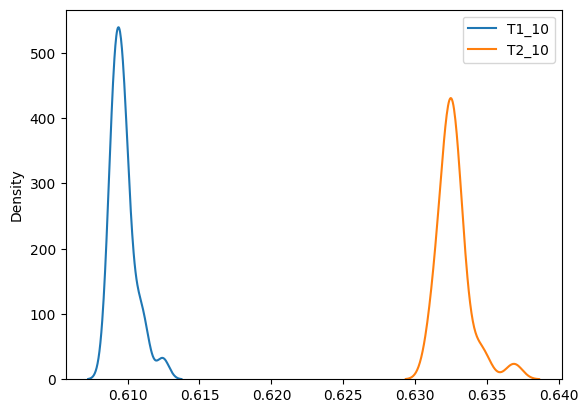

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# sns.kdeplot(T1_1,ax=ax, label='T1_1')
sns.kdeplot(T1_10,ax=ax, label='T1_10')
# sns.kdeplot(T2_1,ax=ax, label='T2_1')
sns.kdeplot(T2_10,ax=ax, label='T2_10')
ax.legend()
